## Cluster Analysis, ANN and Text Mining Project 
Mining Manatees

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Part 1: CLUSTER ANALYSIS. 
I ran a K means algorithm with k values of 2,3,4,5,6 on the imdb movie dataset. I wanted to find clusters on a number of predictors, such as `imdb number votes` , `genre` , `critics_score` and so forth. I used hot encoding to convert the text values of strings to numerical values. From the SSE vs clusters graph, there is strong evidence that k =6, or six clusters have a low mean of squared distances.

['Unnamed: 0', 'title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url']


C:\Users\B-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\B-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\B-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'SSE')

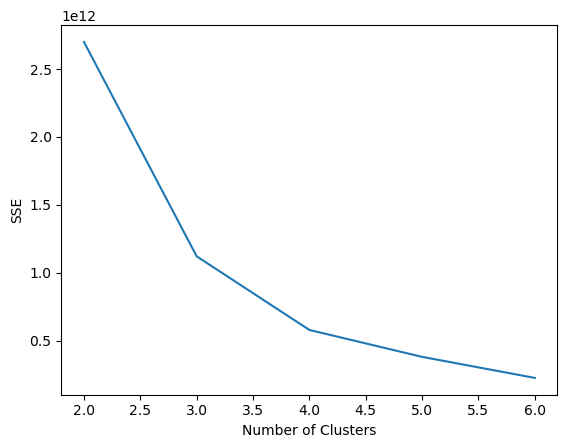

In [7]:
#read data
data = pd.read_csv("C:\\Users\\B-PC\\Desktop\\CSC 177 - Data Mining and Statistics\\Project Deliverables\\Deliverable #4 - Cluster Analysis, ANN and Text Mining\\imdb_dataset.csv")

#preview data
print(list(data.columns))

#i only want to focus on these columns
columnsToKeep = ['title_type', 'genre','runtime','imdb_rating','imdb_num_votes','imdb_num_votes','critics_score','audience_score','best_pic_win','best_actor_win','best_actress_win', 'actor1', 'actor2']

cleanData = data.filter(columnsToKeep)
cleanData = cleanData.dropna()


#encode these columns since they are text columns
cleanData['title_type'] = pd.Categorical(cleanData['title_type']).codes
cleanData['genre'] = pd.Categorical(cleanData['genre']).codes
cleanData['best_pic_win'] = pd.Categorical(cleanData['best_pic_win']).codes
cleanData['best_actor_win'] = pd.Categorical(cleanData['best_actor_win']).codes
cleanData['best_actress_win'] = pd.Categorical(cleanData['best_actress_win']).codes
cleanData['actor1'] = pd.Categorical(cleanData['actor1']).codes
cleanData['actor2'] = pd.Categorical(cleanData['actor2']).codes

#number of clusters, our k value
numClusters = [2,3,4,5,6]

#a list of our sum of squared distances to their closest cluster center
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state = 10)
    k_means.fit(cleanData)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

cluster : Hierarchical clustering with single average linkage , visulalize of the db . using scikit-learn. 

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# load db 
data = pd.read_csv("C:\\Users\\B-PC\\Desktop\\CSC 177 - Data Mining and Statistics\\Project Deliverables\\Deliverable #4 - Cluster Analysis, ANN and Text Mining\\imdb_dataset.csv")

# Select columns of interest
columnsToKeep = ['title_type', 'genre', 'runtime', 'imdb_rating', 'imdb_num_votes',
                 'critics_score', 'audience_score', 'best_pic_win', 'best_actor_win',
                 'best_actress_win', 'actor1', 'actor2']

cleanData = data[columnsToKeep].dropna()

# Encode categorical columns
cleanData['title_type'] = pd.Categorical(cleanData['title_type']).codes
cleanData['genre'] = pd.Categorical(cleanData['genre']).codes
cleanData['best_pic_win'] = pd.Categorical(cleanData['best_pic_win']).codes
cleanData['best_actor_win'] = pd.Categorical(cleanData['best_actor_win']).codes
cleanData['best_actress_win'] = pd.Categorical(cleanData['best_actress_win']).codes
cleanData['actor1'] = pd.Categorical(cleanData['actor1']).codes
cleanData['actor2'] = pd.Categorical(cleanData['actor2']).codes

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleanData)

In [10]:
# Number of clusters
num_clusters = [2, 3, 4, 5, 6]

# Hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average']
results = {}

for linkage in linkage_methods:
    sse = []
    for k in num_clusters:
        # Perform hierarchical clustering
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        cluster_labels = model.fit_predict(scaled_data)
        cluster_centers = np.zeros((k, scaled_data.shape[1]))
        for i in range(k):
            cluster_centers[i] = np.mean(scaled_data[cluster_labels == i], axis=0)
        # Calculate SSE (sum of squared distances)
        sse.append(np.sum((scaled_data - cluster_centers[cluster_labels]) ** 2))
    results[linkage] = sse


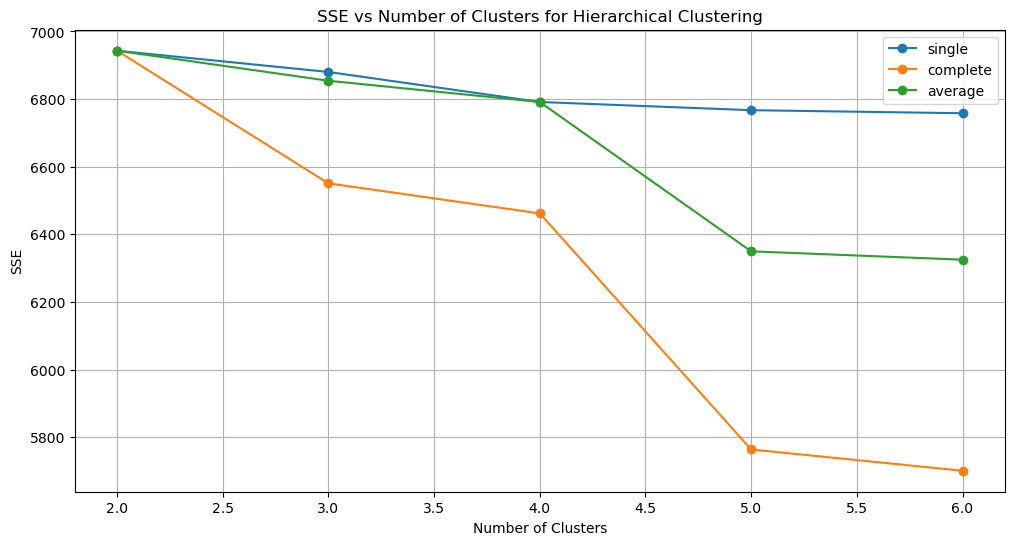

In [11]:
# Plot SSE vs Number of clusters for each linkage method
plt.figure(figsize=(12, 6))
for linkage, sse in results.items():
    plt.plot(num_clusters, sse, marker='o', label=linkage)
plt.title('SSE vs Number of Clusters for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()


### Part 2: Text Mining

In [12]:
data['title'] = data['title'].str.lower().str.replace(r'[^\w\s]+', '', regex=True)

# count vectors
count_vect = CountVectorizer(stop_words='english')
count_matrix = count_vect.fit_transform(data['title'])
count_data = pd.DataFrame(count_matrix.toarray(), columns=count_vect.get_feature_names_out())

# tf-idf vector
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vect.fit_transform(data['title'])
tfidf_normalized = normalize(tfidf_matrix, norm='l1', axis=1)
tfidf_data = pd.DataFrame(tfidf_normalized.toarray(), columns=tfidf_vect.get_feature_names_out())

print("Count Vector DataFrame (First 5 Rows):")
print(count_data.head())

print("\nTF-IDF Vector DataFrame (First 5 Rows):")
print(tfidf_data.head())


Count Vector DataFrame (First 5 Rows):
   1000  101  11  110901  12  18  1941  200  21  25th  ...  year  yes  york  \
0     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
1     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
2     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
3     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   
4     0    0   0       0   0   0     0    0   0     0  ...     0    0     0   

   young  youre  zero  ziggy  zombi  zonethe  zorn  
0      0      0     0      0      0        0     0  
1      0      0     0      0      0        0     0  
2      0      0     0      0      0        0     0  
3      0      0     0      0      0        0     0  
4      0      0     0      0      0        0     0  

[5 rows x 1010 columns]

TF-IDF Vector DataFrame (First 5 Rows):
   1000  101   11  110901   12   18  1941  200   21  25th  ...  year  yes  \
0   0.0  0.0  0.0     0.0

Usage:


### Part 3: ANN (Artificial Neural Network)

In order to create an Artificial Neural Network from the student acceptance dataset a few steps are needed to "prepare" the data through pre-processing. Any Dataset from previous assignments that can be classified can be analyzed using ANN. 

1) The dataset needs to be checked for missing values and fill those values with a data mean "imputation" for number or string values
2) Dataset needs to encode target attribute values into binary values
3) Data needs to be split into training and testing sets

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

# Load dataset 
file_path = "C:\\Users\\B-PC\\Desktop\\CSC 177 - Data Mining and Statistics\\Project Deliverables\\Deliverable #4 - Cluster Analysis, ANN and Text Mining\\Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv"
data_set = pd.read_csv(file_path)

# Drop the'Serial No.' column for preprocessing
data_set_trimmed = data_set.drop(columns=['Serial No.'])

# Normalize certain columns for preprocessing
cols_to_normalize = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']

# Using Min-Max to normalize data between values for preprocessing
data_set_trimmed[cols_to_normalize] = data_set_trimmed[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Convert 'Research' column to int for preprocessing
data_set_trimmed['Research'] = data_set_trimmed['Research'].astype(int)

print(data_set_trimmed.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


In [4]:

# Convert 'Chance of Admit' to binary label encoding
data_set_trimmed['Chance of Admit'] = (data_set_trimmed['Chance of Admit'] > data_set_trimmed['Chance of Admit'].median()).astype(int)

# Split data into features and labels for test data
X = data_set_trimmed.drop(columns=['Chance of Admit']).values
Y = data_set_trimmed['Chance of Admit'].values
print(data_set_trimmed)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



     GRE Score  TOEFL Score  University Rating    SOP  LOR      CGPA  \
0         0.94     0.928571               0.75  0.875  4.5  0.913462   
1         0.68     0.535714               0.75  0.750  4.5  0.663462   
2         0.52     0.428571               0.50  0.500  3.5  0.384615   
3         0.64     0.642857               0.50  0.625  2.5  0.599359   
4         0.48     0.392857               0.25  0.250  3.0  0.451923   
..         ...          ...                ...    ...  ...       ...   
495       0.84     0.571429               1.00  0.875  4.0  0.711538   
496       0.94     0.892857               1.00  1.000  5.0  0.983974   
497       0.80     1.000000               1.00  0.875  5.0  0.884615   
498       0.44     0.392857               0.75  0.750  5.0  0.522436   
499       0.74     0.750000               0.75  0.875  4.5  0.717949   

     Research  Chance of Admit  
0           1                1  
1           1                1  
2           1                0  
3  

In [5]:
# Define model architecture using Sigmoid and Relu activation function for ANN
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ANN model
model.fit(X_train, Y_train, epochs=100, verbose=2)

# Evaluate the test model with predictions and classes from ANN
pred = model.predict(X_test)
pred_classes = np.round(pred).flatten().astype(int)
true_classes = Y_test

print("Test data accuracy is %.2f" % accuracy_score(true_classes, pred_classes))
print(classification_report(true_classes, pred_classes))

Epoch 1/100


C:\Users\B-PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 - 1s - 45ms/step - accuracy: 0.4925 - loss: 0.6894
Epoch 2/100
13/13 - 0s - 1ms/step - accuracy: 0.6725 - loss: 0.6851
Epoch 3/100
13/13 - 0s - 1ms/step - accuracy: 0.7550 - loss: 0.6809
Epoch 4/100
13/13 - 0s - 1ms/step - accuracy: 0.7650 - loss: 0.6757
Epoch 5/100
13/13 - 0s - 1ms/step - accuracy: 0.7750 - loss: 0.6704
Epoch 6/100
13/13 - 0s - 1ms/step - accuracy: 0.7825 - loss: 0.6650
Epoch 7/100
13/13 - 0s - 1ms/step - accuracy: 0.7775 - loss: 0.6601
Epoch 8/100
13/13 - 0s - 1ms/step - accuracy: 0.7925 - loss: 0.6548
Epoch 9/100
13/13 - 0s - 1ms/step - accuracy: 0.8100 - loss: 0.6492
Epoch 10/100
13/13 - 0s - 1ms/step - accuracy: 0.8100 - loss: 0.6433
Epoch 11/100
13/13 - 0s - 1ms/step - accuracy: 0.8200 - loss: 0.6367
Epoch 12/100
13/13 - 0s - 1ms/step - accuracy: 0.8225 - loss: 0.6296
Epoch 13/100
13/13 - 0s - 1ms/step - accuracy: 0.8175 - loss: 0.6224
Epoch 14/100
13/13 - 0s - 1ms/step - accuracy: 0.8175 - loss: 0.6144
Epoch 15/100
13/13 - 0s - 1ms/step - accuracy: 0.8175 

Assignment4 consists of ANN based classification, cluster analysis and text mining.

Create a Report on all three areas.

PART I - CLUSTER ANALYSIS
	
A K means algorithm was run with k values of 2,3,4,5,6 on a imdb movie dataset. The goal was to find clusters on a number of predictors such as imdb, number votes, genre, and critics_score. Hot encoding was used to convert the text values of strings to numerical values. A graph was created to observe the number of clusters and SSE. We can observe that k=6, or six clusters, have a low mean of squared distances. In addition, a hierarchical clustering with different linkage methods was applied (single, complete, and average) to calculate the sum of squared distances for each clustering result. Results show that a complete linkage method has the least amount of clusters and a single linkage method has the greatest amount. 

PART II - Text mining 

For text mining, a text data set was preprocessed and converted into numerical representations using Count Vectorization and TF-IDF Vectorization techniques. CountVectorizer was used to convert text data into a matrix where each row represents a document and each column represents a unique word in the corpus. TfidVectorizer is used to convert text data into a matrix where each row represents a document and each column represents a unique word in the corpus, weighted by its TF-IDF score. 


Part III - ANN 

To create an Artificial Neural Network, the dataset had to be loaded and pre-processed (extra credit step). The Serial No (serial number) column was dropped from the student admissions dataset. 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA' were normalized within a scale between minimum and maximum - this ensured that all these features had a consistent scale, preventing any one feature from dominating the learning process due to an uneven magnitude. The 'Research' column was encoded to integer type to ensure compatibility. Subsequently, the 'Chance of Admit' column attribute was transformed into value binarization, indicating acceptance or rejection based on whether the admission chance was above or below the median. This prepared the dataset for binary classification. The data was then split into training and testing sets to facilitate model evaluation. Constructing the ANN model, a sequential model was defined using Keras. Three dense layers were added to the model, each with a specific number of neurons and activation functions. The first layer consisted of 12 neurons with a ReLU activation function, the second layer had 6 neurons also with ReLU activation, and the final layer had 1 neuron with a sigmoid activation function for binary classification. After compiling the model with binary cross-entropy loss and an Adam optimizer, the model was trained on the training data for 100 epochs (100 passes through the training dataset - adjusting weights and biases each time). Finally, the trained model was evaluated on the test data, and its accuracy and performance were assessed using various metrics such as accuracy score and classification report. The accuracy turned out to be higher than average - indicating a good neural network. 
